In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../dataFiles/Position_Salaries.csv")
print(data)

            Position  Level   Salary
0   Business Analyst      1    45000
1  Junior Consultant      2    50000
2  Senior Consultant      3    60000
3            Manager      4    80000
4    Country Manager      5   110000
5     Region Manager      6   150000
6            Partner      7   200000
7     Senior Partner      8   300000
8            C-level      9   500000
9                CEO     10  1000000


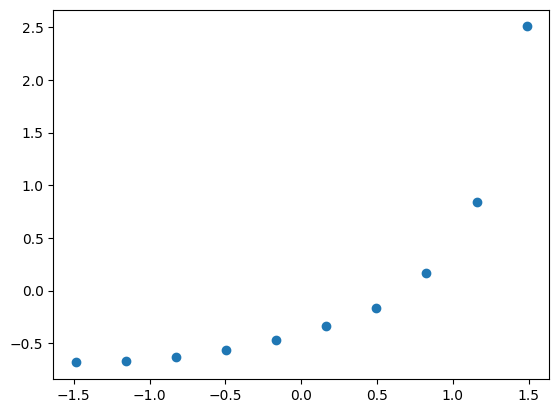

In [3]:
X = data.iloc[:, 1]
y = data.iloc[:, 2]

mean_X = X.mean()
std_X = X.std()
X = (X - mean_X) / std_X

# Standardization for y
mean_y = y.mean()
std_y = y.std()
y = (y - mean_y) / std_y

plt.scatter(X, y)
plt.show()

In [73]:
# Add polynomial features (quadratic in this case)
X_poly = np.column_stack((X, X**2))

m = np.zeros(2)  # Coefficients for X and X^2
learning_rate = 0.09
epochs = 1000
for i in range(epochs):
    y_pred = X_poly.dot(m)
    grad_m = (-2 / len(X)) * X_poly.T.dot(y - y_pred)
    m -= learning_rate * grad_m
print("Coefficients (m0, m1):", m)

Coefficients (m0, m1): [0.81794941 0.25992815]


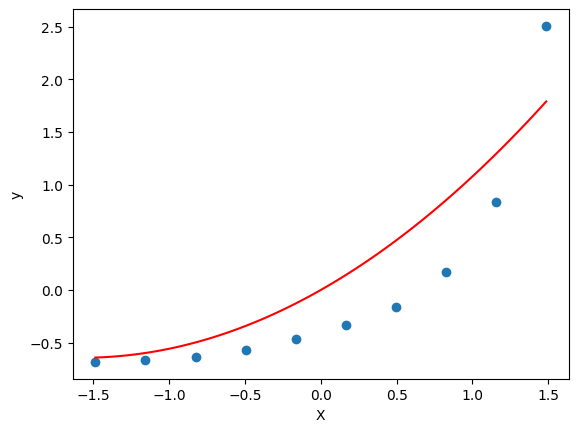

In [74]:
# Visualization
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")

# Generate points for the polynomial curve
X_fit = np.linspace(X.min(), X.max(), 100)
X_fit_poly = np.column_stack((X_fit, X_fit**2))
y_fit = X_fit_poly.dot(m)

plt.plot(X_fit, y_fit, color='red')
plt.show()